Michael Gentile
DBMS 260-51P
J.Perry

This Wine Dataset was scaped from Wine.com and provides a table of seemingly arbitrary data points.  I hope to see if there are any relationships between wine/country and price.  I also hope to see if there is a correlation between a major wine publication rating a wine and the user rating given on Win.com.  Finally, I hope to determine (according to Wine.com) any correlations between vintage, price, and customer rating.

To complete this analysis and have a better understanding of wine ratings, I decided to include only wines that had at least one customer rating.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define dataset to complete analysis
file_path = 'M06_FinalProject_CleanedDataset_MGentile.xlsx'
data = pd.read_excel(file_path)

In [77]:
# Filtering the dataset to include only wines with at least one rating
rated_wines_all = data[data['RATING_COUNT'] > 0]

# Recalculating basic statistics for the filtered dataset
rated_basic_stats = rated_wines_all.describe()
rated_non_numeric_stats = rated_wines_all.describe(include=['object'])

rated_basic_stats, rated_non_numeric_stats


(            PRICES    VOLUME_ML      RATINGS  RATING_COUNT        ABV %  \
 count  4095.000000  4095.000000  4095.000000   4095.000000  4095.000000   
 mean     60.381035   740.673504     4.028620     37.635409    11.369460   
 std     257.830074    91.856229     0.476237     87.102768     5.376305   
 min       4.970000   187.000000     1.600000      5.000000     0.000000   
 25%      17.990000   750.000000     3.700000      8.000000    12.000000   
 50%      24.990000   750.000000     4.000000     16.000000    13.500000   
 75%      42.990000   750.000000     4.300000     33.000000    14.500000   
 max    9999.990000  3000.000000     5.000000   1829.000000    21.000000   
 
        JAMES_SUCKLING  ROBERT_PARKER  WINE_ENTHUSIAST  WINE_SPECTATOR  \
 count     4095.000000    4095.000000      4095.000000     4095.000000   
 mean         0.325519       0.217582         0.224176        0.194383   
 std          0.468626       0.412652         0.417089        0.395774   
 min          0.00

Basic Numeric Statistics (For Rated Wines)

Prices: The average price is around $60.38, with a standard deviation of $257.83. The range is from $4.97 to $9999.99.
Volume (ml): Most wines are still around 750 ml. The range is narrower, from 187 ml to 3000 ml.
Ratings: The average rating is now 4.03, with a standard deviation of 0.48. This is a more reliable indicator of wine quality.
Rating Count: The average number of ratings is about 38, with a much higher standard deviation of 87, indicating a wide variation in the number of ratings received.
ABV% (Alcohol By Volume): The average ABV is now around 11.37%, with a range from 0% to 21%.

Non-Numeric Data (For Rated Wines)

Wine Types: Out of 10 types, 'Red Wine' remains the most common.
Country/Region: Represented by 364 different regions, with California being the most frequent.
Years: Covers 28 different years, with 2019 as the most common year.
Grape Varietals: 112 different grape varietals are represented, with 'Cabernet Sauvignon' being the most common.

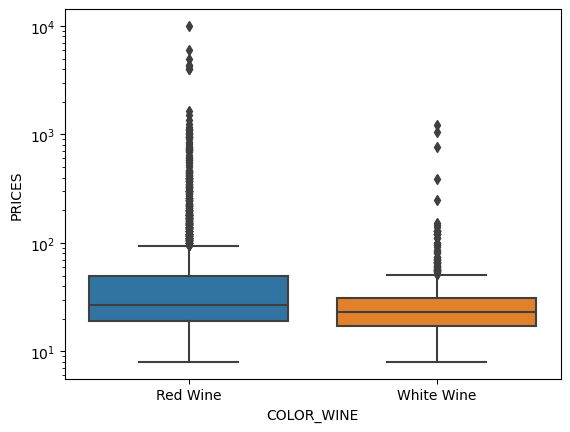

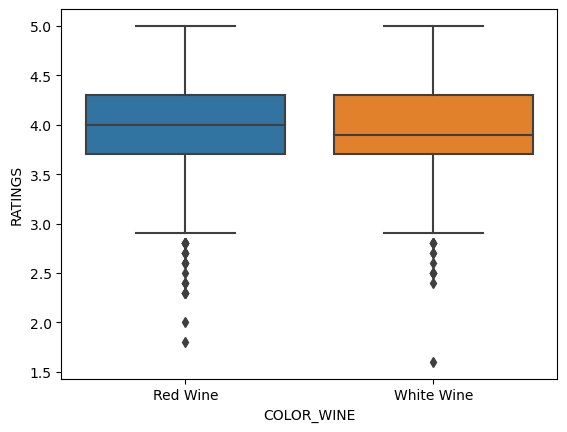

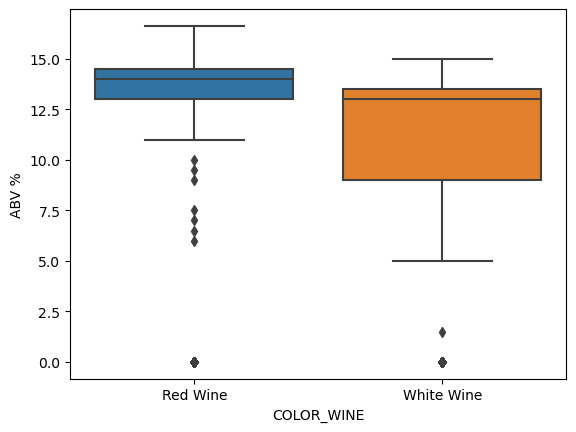

In [78]:
rated_red_white_wines = rated_wines_all[rated_wines_all['COLOR_WINE'].isin(['Red Wine', 'White Wine'])]

# Price Distribution
sns.boxplot(x='COLOR_WINE', y='PRICES', data=rated_red_white_wines)
plt.yscale('log')
plt.show()

# Ratings Distribution
sns.boxplot(x='COLOR_WINE', y='RATINGS', data=rated_red_white_wines)
plt.show()

# ABV% Distribution
sns.boxplot(x='COLOR_WINE', y='ABV %', data=rated_red_white_wines)
plt.show()


Price Distribution

Red vs. White Wines: Both types show a wide price range. However, red wines tend to have a higher price distribution, with more expensive outliers compared to white wines.
The use of a logarithmic scale highlights the significant variance in prices across both categories.

Ratings Distribution

Red vs. White Wines: The ratings for both red and white wines are generally high, reflecting the fact that we are now considering only rated wines. The median ratings are similar for both, suggesting comparable quality perceptions.
The distribution of ratings is fairly tight for both types, with most wines clustered around the higher end of the scale.

ABV% (Alcohol By Volume) Distribution

Red vs. White Wines: Red wines exhibit a slightly higher ABV% on average compared to white wines.
The spread of ABV% is similar in both categories, with most wines falling within a common range.

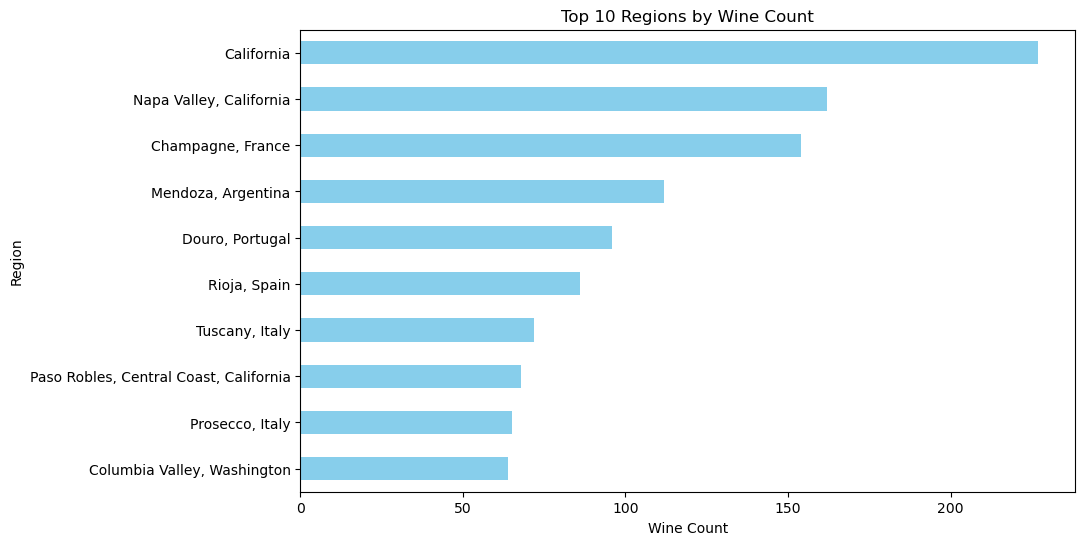

,Average_Price,Average_Rating,Average_ABV,Wine_Count
COUNTRY_REGION,,,,
California,18.245419,3.848018,11.500969,227
"Napa Valley, California",73.865617,4.232716,13.076543,162
"Champagne, France",93.888701,4.325974,11.590909,154
"Mendoza, Argentina",24.159554,3.932143,11.811161,112
"Douro, Portugal",54.344062,4.236458,18.774375,96
"Rioja, Spain",31.268488,4.052326,10.131744,86
"Tuscany, Italy",55.767639,4.212500,9.708333,72
"Paso Robles, Central Coast, California",35.445882,4.026471,13.500000,68
"Prosecco, Italy",16.712308,3.970769,10.906154,65


In [79]:
# The top regions based on wine count
geo_analysis = rated_wines_all.groupby('COUNTRY_REGION').agg(
    Average_Price=('PRICES', 'mean'),
    Average_Rating=('RATINGS', 'mean'),
    Average_ABV=('ABV %', 'mean'),
    Wine_Count=('NAMES', 'count')
).sort_values(by='Wine_Count', ascending=False)

top_regions = geo_analysis.head(10)

# Visualizing the top 10 regions by wine count
top_regions_wine_count = top_regions['Wine_Count'].sort_values(ascending=True)
plt.figure(figsize=(10, 6))
top_regions_wine_count.plot(kind='barh', color='skyblue')
plt.title('Top 10 Regions by Wine Count')
plt.xlabel('Wine Count')
plt.ylabel('Region')
plt.show()


geo_analysis.head(10)


Observations

Napa Valley and Champagne stand out for their higher average prices and ratings, suggesting a premium quality perception.
Douro, Portugal has the highest average ABV%, indicating a preference for stronger wines in this region.
The average price varies significantly across regions, from the more affordable Californian wines to the more expensive ones from Champagne and Napa Valley.

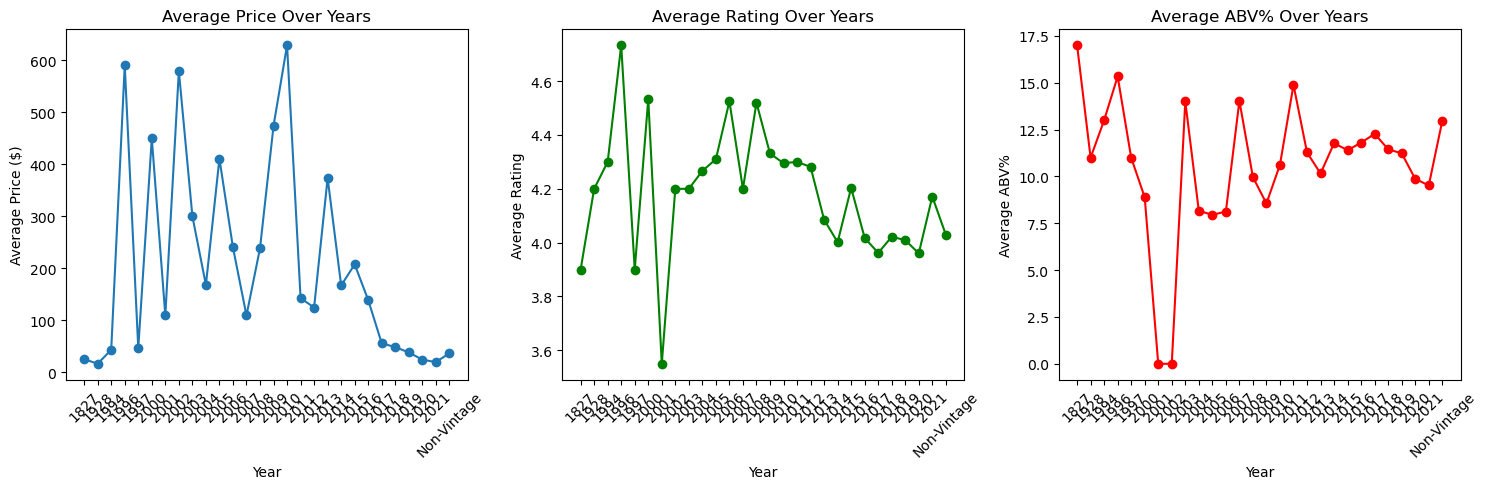

In [80]:
# Grouping the data by year and calculating average price, rating, and ABV%
year_analysis = rated_wines_all.groupby('YEAR').agg(
    Average_Price=('PRICES', 'mean'),
    Average_Rating=('RATINGS', 'mean'),
    Average_ABV=('ABV %', 'mean'),
    Wine_Count=('NAMES', 'count')
).sort_values(by='YEAR')

# Displaying the year-wise trends
year_analysis

# Plotting the trends over years
plt.figure(figsize=(15, 5))

# Average Price Over Years
plt.subplot(1, 3, 1)
plt.plot(year_analysis.index, year_analysis['Average_Price'], marker='o')
plt.title('Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

# Average Rating Over Years
plt.subplot(1, 3, 2)
plt.plot(year_analysis.index, year_analysis['Average_Rating'], marker='o', color='green')
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Average ABV% Over Years
plt.subplot(1, 3, 3)
plt.plot(year_analysis.index, year_analysis['Average_ABV'], marker='o', color='red')
plt.title('Average ABV% Over Years')
plt.xlabel('Year')
plt.ylabel('Average ABV%')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Observations

Average Price: There is noticeable variation in average prices across different years. Notably, the 2010s show some of the highest average prices, particularly in 2010 and 2009.
Average Rating: The average rating appears relatively stable across years, typically hovering around 4.0. This suggests a consistent level of quality as perceived by reviewers.
Average ABV%: The alcohol content varies across years. Earlier vintages (like 1827 and 1928) and non-vintage wines have higher ABV%, but this data might be less reliable due to fewer data points.
Wine Count: More recent years, particularly 2019 and 2020, have a higher count of wines with ratings, indicating an increase in the number of wines being rated.

Interesting Points

1996, 2000, 2005, and 2010 show higher average prices, which could indicate these years had more premium wines or simply a smaller sample size of high-priced wines.
Non-Vintage Wines: These wines have a significant presence in the dataset and exhibit a higher average ABV%.

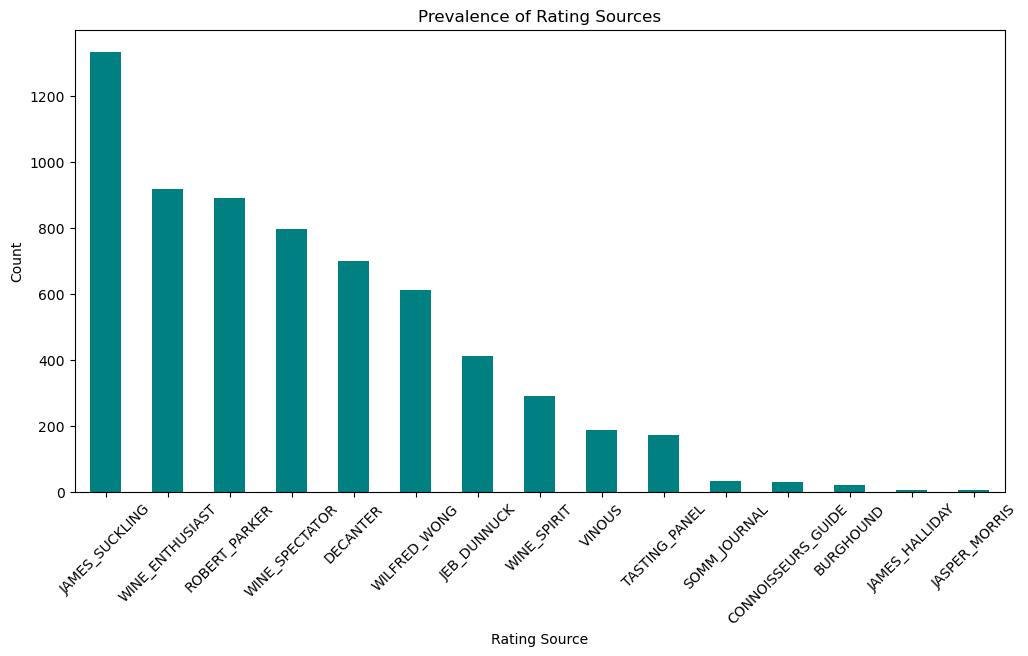

,Average Price,Average Rating
BURGHOUND,246.036667,4.747619
JASPER_MORRIS,282.987500,4.475000
CONNOISSEURS_GUIDE,114.295517,4.337931
DECANTER,169.167814,4.203714
JEB_DUNNUCK,187.920291,4.201456
WINE_SPECTATOR,166.079334,4.198116
ROBERT_PARKER,166.040920,4.155892
WILFRED_WONG,54.722197,4.142623
JAMES_SUCKLING,115.975259,4.129032
WINE_SPIRIT,84.461834,4.121799


In [81]:
# List of rating sources columns in the dataset
rating_sources = [
    'JAMES_SUCKLING', 'ROBERT_PARKER', 'WINE_ENTHUSIAST', 'WINE_SPECTATOR',
    'JEB_DUNNUCK', 'DECANTER', 'WILFRED_WONG', 'VINOUS', 'WINE_SPIRIT',
    'BURGHOUND', 'TASTING_PANEL', 'JASPER_MORRIS', 'JAMES_HALLIDAY', 
    'SOMM_JOURNAL', 'CONNOISSEURS_GUIDE'
]

# Counting the prevalence of each rating source
rating_source_counts = rated_wines_all[rating_sources].sum().sort_values(ascending=False)

# Plotting the prevalence of each rating source
plt.figure(figsize=(12, 6))
rating_source_counts.plot(kind='bar', color='teal')
plt.title('Prevalence of Rating Sources')
plt.xlabel('Rating Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Computing average price and rating for each rating source
average_price_rating_by_source = {}
for source in rating_sources:
    source_data = rated_wines_all[rated_wines_all[source] == 1]
    average_price = source_data['PRICES'].mean()
    average_rating = source_data['RATINGS'].mean()
    average_price_rating_by_source[source] = {'Average Price': average_price, 'Average Rating': average_rating}

# Converting the results to a DataFrame for easier visualization
average_price_rating_df = pd.DataFrame(average_price_rating_by_source).T.sort_values(by='Average Rating', ascending=False)

average_price_rating_df

Prevalence of Rating Sources

The bar chart illustrates the frequency of each rating source in the dataset. Sources like James Suckling, Robert Parker, and Wine Enthusiast are among the most commonly used for rating wines in this dataset.
Some sources like Burghound, Jasper Morris, and Connoisseurs Guide are less common but are still used for a significant number of wines.

Average Price and Rating by Source

Burghound and Jasper Morris have the highest average ratings, though they rate fewer wines. Wines rated by these sources also tend to be more expensive on average.
More commonly used sources like James Suckling, Robert Parker, and Wine Enthusiast offer a balance of ratings and prices, suggesting their use across a wider range of wine types and qualities.
James Halliday has the lowest average rating, and wines rated by this source tend to be more affordable.

Overall Conclusion

The dataset reveals a diverse range of wines with varying characteristics. While red wines tend to be pricier and have slightly higher ABV% than white wines, the quality (as reflected in ratings) is comparable across wine types. Geographical origin plays a significant role in determining the wine's price and perceived quality, with certain regions standing out for premium wines. Yearly trends show some fluctuations in price and ABV% but a consistent level of quality. Finally, the choice of rating source can provide insights into the wine's market positioning, with some sources being associated with higher quality and price.

These insights offer a comprehensive overview of the dataset, highlighting the nuances and trends within the world of wine as represented in this data.